In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [84]:

np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 0.5 * X**2 - 2 * X + 1 + np.random.normal(0, 1, 100)

In [85]:
# reshape

X = X[:, np.newaxis]

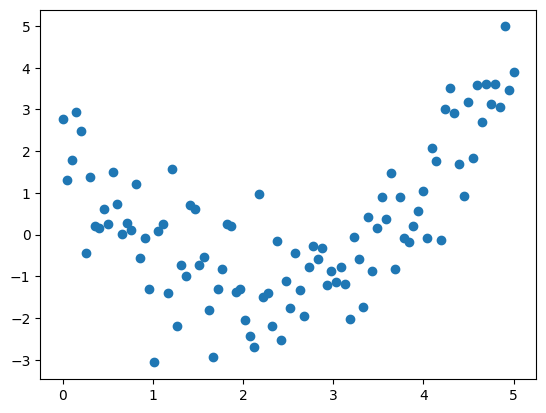

In [86]:
plt.scatter(X,y)
plt.show()

In [87]:
#instantiation of the model
simple_linear_model = LinearRegression()

In [88]:
#fitting and transforming
simple_linear_model.fit(X,y)

LinearRegression()

In [89]:
simple_linear_model.coef_

array([0.44053463])

In [90]:
simple_linear_model.intercept_

np.float64(-0.8538181144473558)

In [91]:
simple_y_prediction = simple_linear_model.predict(X)

In [92]:
#residual
residuals = y - simple_y_prediction
residuals

array([ 3.61787046,  2.13199138,  2.59113897,  3.73641176,  3.24874489,
        0.29212811,  2.11026427,  0.90213926,  0.84614899,  1.25838848,
        0.89280645,  2.10656004,  1.31939867,  0.58866114,  0.8220253 ,
        0.62556309,  1.70224529, -0.07816383,  0.36144111, -0.88179259,
       -2.65420617,  0.4814335 ,  0.62383312, -1.04863532,  1.89996786,
       -1.88491814, -0.44300889, -0.73161543,  0.93523421,  0.8212511 ,
       -0.54117214, -0.36341819, -1.67227684, -2.80564718, -1.21057172,
       -0.7415687 ,  0.29966567,  0.24159826, -1.37571423, -1.31574522,
       -2.08449973, -2.47591824, -2.77957328,  0.86262029, -1.61010855,
       -1.54828117, -2.37020196, -0.34456523, -2.73805165, -1.33644154,
       -2.01616452, -0.7282414 , -1.61784421, -2.27701568, -1.11135938,
       -0.63908818, -0.98259496, -0.72578166, -1.63916627, -1.3416252 ,
       -1.62283358, -1.27886463, -1.69884533, -2.57581847, -0.63339578,
       -1.17133815, -2.3559401 , -0.21659327, -1.53775691, -0.52

In [101]:
#polynomial transformations

degree= PolynomialFeatures(degree=3)
X_poly= degree.fit_transform(X)

In [94]:
X_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.05050505e-02, 2.55076013e-03],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 1.51515152e-01, 2.29568411e-02],
       [1.00000000e+00, 2.02020202e-01, 4.08121620e-02],
       [1.00000000e+00, 2.52525253e-01, 6.37690032e-02],
       [1.00000000e+00, 3.03030303e-01, 9.18273646e-02],
       [1.00000000e+00, 3.53535354e-01, 1.24987246e-01],
       [1.00000000e+00, 4.04040404e-01, 1.63248648e-01],
       [1.00000000e+00, 4.54545455e-01, 2.06611570e-01],
       [1.00000000e+00, 5.05050505e-01, 2.55076013e-01],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01],
       [1.00000000e+00, 6.06060606e-01, 3.67309458e-01],
       [1.00000000e+00, 6.56565657e-01, 4.31078461e-01],
       [1.00000000e+00, 7.07070707e-01, 4.99948985e-01],
       [1.00000000e+00, 7.57575758e-01, 5.73921028e-01],
       [1.00000000e+00, 8.08080808e-01, 6.52994592e-01],
       [1.00000000e+00, 8.58585

In [95]:
poly_model= LinearRegression()

In [96]:
poly_model.fit(X_poly,y)

LinearRegression()

In [97]:
poly_model.coef_

array([ 0.        , -3.09546501,  0.70719993])

In [98]:
poly_model.intercept_

np.float64(2.0630839454796694)

In [99]:
y_poly= poly_model.predict(X_poly)

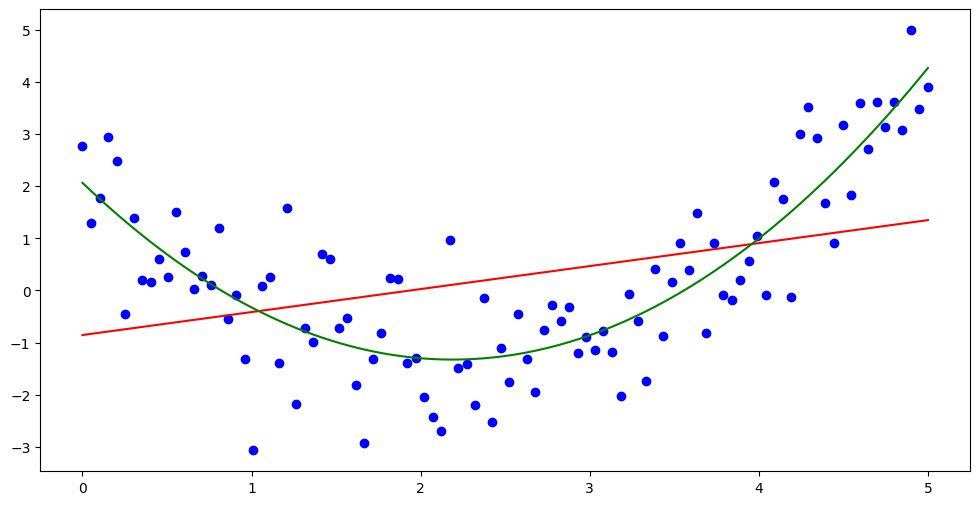

In [100]:
plt.figure(figsize =(12,6))
plt.scatter(X,y,color='blue')
plt.plot(X,simple_y_prediction,color= 'red')
plt.plot(X,y_poly,color = 'green')
plt.show()


**
APPLYING REGULIZATION

***Make Pipeline

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso

In [116]:
#2 parameters; degree & lambda to apply within regulization
degree= 20
alpha = 2500

In [117]:
model_pipeline= make_pipeline(PolynomialFeatures(degree=degree),Ridge(alpha=alpha))

In [118]:
model_pipeline.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('ridge', Ridge(alpha=2500))])

In [119]:
y_ridge = model_pipeline.predict(X)
y_ridge

array([ 0.30584307,  0.30558648,  0.30528882,  0.3049404 ,  0.30452847,
        0.30403604,  0.3034403 ,  0.30271052,  0.30180525,  0.3006688 ,
        0.29922679,  0.29738097,  0.29500322,  0.2919289 ,  0.28795006,
        0.28280869,  0.27619085,  0.26772218,  0.25696565,  0.24342246,
        0.22653665,  0.20570446,  0.18028864,  0.14963829,  0.11311399,
        0.07011809,  0.02012912, -0.03726072, -0.10230658, -0.17507267,
       -0.25539662, -0.34285925, -0.43676196, -0.53611442, -0.63963441,
       -0.74576171, -0.85268697, -0.95839602, -1.06072894, -1.15745251,
       -1.24634354, -1.32527982, -1.39233424, -1.44586752, -1.48461401,
       -1.50775523, -1.51497578, -1.50649687, -1.48308364, -1.44602347,
       -1.39707432, -1.33838367, -1.27238073, -1.20164648, -1.12876811,
       -1.05618601, -0.98604285, -0.92004491, -0.85934623, -0.80446524,
       -0.75524225, -0.71084403, -0.66981841, -0.63019844, -0.58965149,
       -0.54566409, -0.49574958, -0.43766166, -0.36959464, -0.29

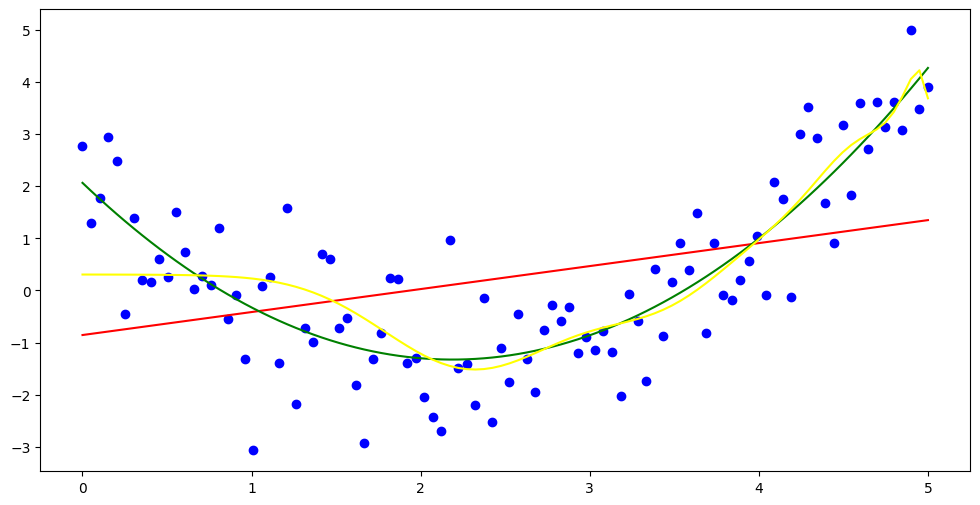

In [120]:
plt.figure(figsize =(12,6))
plt.scatter(X,y,color='blue')
plt.plot(X,simple_y_prediction,color= 'red')
plt.plot(X,y_poly,color = 'green')
plt.plot(X,y_ridge, color='yellow')
plt.show()
